# Support Vector Machine (SVM)
SVM is a supervised machine learning model for classification tasks. It's really good at doing both classification and regression simultaneously.


If you have a lot of data that needs to be classified, an SVM can help you achieve that


For two dimensions (when we have two features), assume the target has two classes. The SVM will obtain the best line that seperates the data into two groups

What are Support Vectors in SVM?

Support vectors are the datapoints that lie closest to the decision boundary

# Brain Health
We have medical data on brain health through the following Brain Health Dataset

Two features (X1 and X2 columns) are given that are related to brain chemistry:

Serotonin

Dopamine

The target (y column) shows brain health by indicating having (-1) or not having (1) depression.

1 means subject does not have depression

-1 means subject does have depression

In [4]:
import pandas as pd

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)

In [6]:
print(df)

         X1        X2  y
0  2.947814  6.626878  1
1  2.530388  7.785050  1
2  3.566991  5.651046  1
3  3.156983  5.467077  1
4  2.582346  4.457777 -1
5  2.155826  6.222343 -1
6  3.273418  3.520687 -1


# Lets build our X_train and Y_train arrays

In [10]:
import numpy as np

#serotonin and dopamine levels
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))

print(X_train)

[[2.947814 6.626878]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]


In [9]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


In [27]:
#build two lists whose color/label values match with the values of the y_train array at the corresponding indices

color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

['b', 'b', 'b', 'b', 'r', 'r', 'r']


In [28]:
label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']


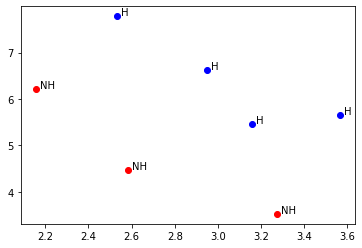

In [29]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

In [30]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10)
# find the best fit line
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

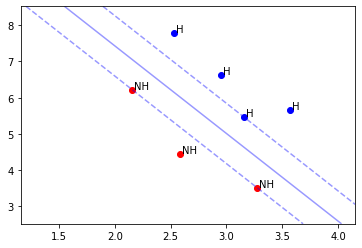

In [33]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [34]:
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [35]:
# What are those support vectors:

In [36]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [38]:
# Am I healthy?
# use the SVM classifier to see if I am deppressed?

svm_classifier.predict([[3,6]])

array([1])

# SVM-Dataset2

In [75]:
import pandas as pd
import numpy as np

df=pd.read_csv('SVM_Dataset2.csv')

In [76]:
print(df)

      x1  x2  y
0    7.0  20 -1
1    8.0  12 -1
2    9.0  19 -1
3   10.0  17 -1
4   11.0  15 -1
5   13.0  14 -1
6   14.0  12 -1
7   15.0  14 -1
8   15.0  17 -1
9   16.0  16 -1
10   4.0  15  1
11   5.5  12  1
12   7.0  10  1
13   8.0  10  1
14   9.0   9  1
15  10.0   8  1
16  11.0   5  1
17  12.0   7  1
18  12.0   9  1
19  13.0  10  1


In [96]:
# import numpy as np
# x1=df['X1']
# x2=df['X2']
# X_train=np.array(list(zip(X1,X2)))

# print(X_train)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [89]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
X

array([[ 2.64607852,  0.60023581],
       [ 1.46810698,  3.3613398 ],
       [ 2.80133699, -1.46591682],
       ...,
       [ 1.68550965,  2.53503626],
       [ 1.68945865,  2.86728609],
       [ 1.45085528,  2.28630668]])

In [93]:
len(y)

1100

In [92]:
# How many 0 class and how many 1 class we have in y list?

sum([1 for i in y if i == 0])

1000

In [94]:
sum([0 for i in y if i == 0])

0

Also, think about these five terminologies as we will use a lot in DS 2.1:

1- What is X_train?

2- What is y_train?

3- What is X_test?

4- What is y_test?

5- What is y_pred (y_prediction)?